In this code snippet, we define the extract_color_histogram function, which takes an image as input and returns the color histogram features. The function converts the image to the HSV color space using cv2.cvtColor, computes the color histogram using cv2.calcHist, normalizes the histogram using cv2.normalize, and flattens the histogram into a 1D feature vector.

Then, we initialize an empty list to store the features. We loop through the image paths, load each image using cv2.imread, and extract the color histogram features using extract_color_histogram. The extracted features are then appended to the feature list.

Finally, we convert the feature list to a numpy array for further processing or training with the random forest classifier/logistic Regression.

In [3]:
import cv2
import numpy as np

def extract_color_histogram(image, bins=(8, 8, 8)):
    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Compute the color histogram
    hist = cv2.calcHist([hsv_image], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    
    # Normalize the histogram
    cv2.normalize(hist, hist)
    
    # Flatten the histogram into a 1D feature vector
    features = hist.flatten()
    
    return features


In [28]:
import os

# Directory where your images are located
image_directory = "./dataset/VegetableImages/train/"

# Initialize an empty list to store the image paths
image_paths = []
labels = []

# Iterate through all files in the directory
for root, dirs, files in os.walk(image_directory):
    for file in files:
        # Check if the file has an image extension (e.g., ".jpg", ".png")
        if file.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
            # Construct the full path of the image file
            image_path = os.path.join(root, file)
            
            # Add the image path to the list
            image_paths.append(image_path)
            
            # Extract the label from the directory name
            label = os.path.basename(root)
            
            # Add the label to the list
            labels.append(label)

In [5]:
# Initialize an empty list to store the features
features = []

# Loop through the image paths
for image_path in image_paths:
    # Load the image
    image = cv2.imread(image_path)
    
    # Extract color histogram features
    hist_features = extract_color_histogram(image)
    
    # Append the features to the list
    features.append(hist_features)

# Convert the feature list to a numpy array
features = np.array(features)

In [46]:
features.shape

(5000, 512)

### Preparing Test data

In [23]:
import os

# Directory where your images are located
image_directory = "./dataset/VegetableImages/test/"

# Initialize an empty list to store the image paths
image_paths = []
labels_test = []

# Iterate through all files in the directory
for root, dirs, files in os.walk(image_directory):
    for file in files:
        # Check if the file has an image extension (e.g., ".jpg", ".png")
        if file.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
            # Construct the full path of the image file
            image_path = os.path.join(root, file)
            
            # Add the image path to the list
            image_paths.append(image_path)
            
            # Extract the label from the directory name
            label = os.path.basename(root)
            
            # Add the label to the list
            labels_test.append(label)
            
# Initialize an empty list to store the features
features_test = []

# Loop through the image paths
for image_path in image_paths:
    # Load the image
    image = cv2.imread(image_path)
    
    # Extract color histogram features
    hist_features = extract_color_histogram(image)
    
    # Append the features to the list
    features_test.append(hist_features)

# Convert the feature list to a numpy array
features = np.array(features)

In [24]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [17]:
# Create a logistic regression model
logreg_model = LogisticRegression()

# Train the logistic regression model
logreg_model.fit(features, labels)


LogisticRegression()

In [25]:
# Predict the labels for the test set
y_pred = logreg_model.predict(features_test)

# Calculate accuracy score
accuracy = accuracy_score(labels_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9728370221327968


In [27]:
from sklearn.metrics import classification_report

# Assuming you have y_test and y_pred from your logistic regression model

# Generate the classification report
report = classification_report(labels_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

        Bean       0.97      0.97      0.97       200
      Papaya       0.99      0.98      0.99       200
      Potato       0.99      0.97      0.98       200
      Radish       0.95      0.98      0.96       194
      Tomato       0.96      0.95      0.96       200

    accuracy                           0.97       994
   macro avg       0.97      0.97      0.97       994
weighted avg       0.97      0.97      0.97       994



In [30]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_classifier.predict(features_test)

# Calculate accuracy score
accuracy = accuracy_score(labels_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9959758551307847


In [32]:
from sklearn.metrics import classification_report

# Assuming you have y_test and y_pred from your logistic regression model

# Generate the classification report
report = classification_report(labels_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

        Bean       0.99      0.99      0.99       200
      Papaya       1.00      1.00      1.00       200
      Potato       1.00      1.00      1.00       200
      Radish       0.99      1.00      1.00       194
      Tomato       0.99      0.98      0.99       200

    accuracy                           1.00       994
   macro avg       1.00      1.00      1.00       994
weighted avg       1.00      1.00      1.00       994



### Calculating the feature vectore for Logistic Regression and Random Forest

In [34]:
# Extract the coefficients of the logistic regression model
coefficients = logreg_model.coef_[0]

# Calculate the feature vectors for logistic regression
feature_vectors_model2 = features_test * coefficients

In [36]:
# Extract the feature importances from the random forest model
importances = rf_classifier.feature_importances_

# Calculate the feature vectors for the random forest
feature_vectors_model1 = features_test * importances

### Calculating the anova test for the both the model 

In [40]:
from sklearn.feature_selection import f_classif


# Perform ANOVA test on the feature vectors of logistic regression
f_scores_model1, p_values_model1 = f_classif(feature_vectors_model1, labels_test)

# Perform ANOVA test on the feature vectors of random forest
f_scores_model2, p_values_model2 = f_classif(feature_vectors_model2, labels_test)


/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [182 183 190 191 223 231 238 239 247 255 309 319 351 357 358 359 366 367
 374 375 382 383 407 411 412 413 414 415 419 421 422 423 426 427 428 429
 430 431 433 436 437 438 439 441 442 443 444 445 446 447] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [183 190 191 367 375 382 383 423 431 438 439 444 445 446 447] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in 

### Bar plot representing the fscore and pvalue for each model

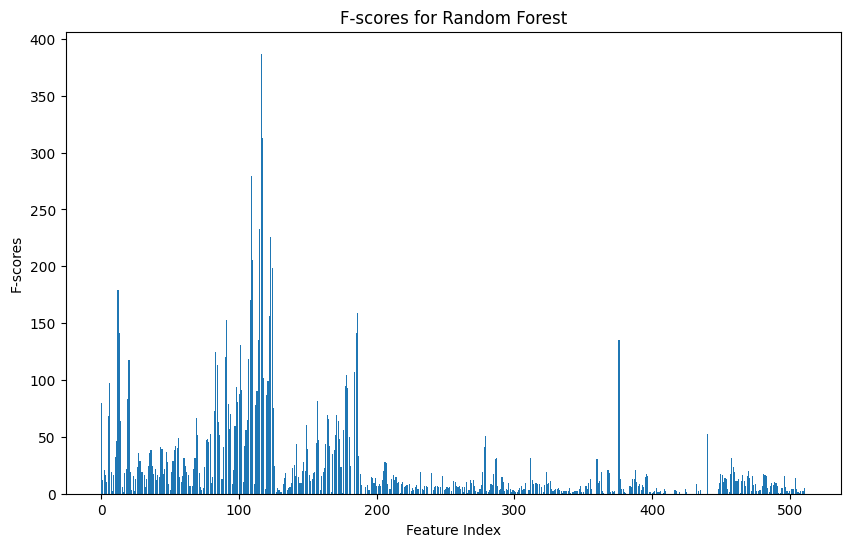

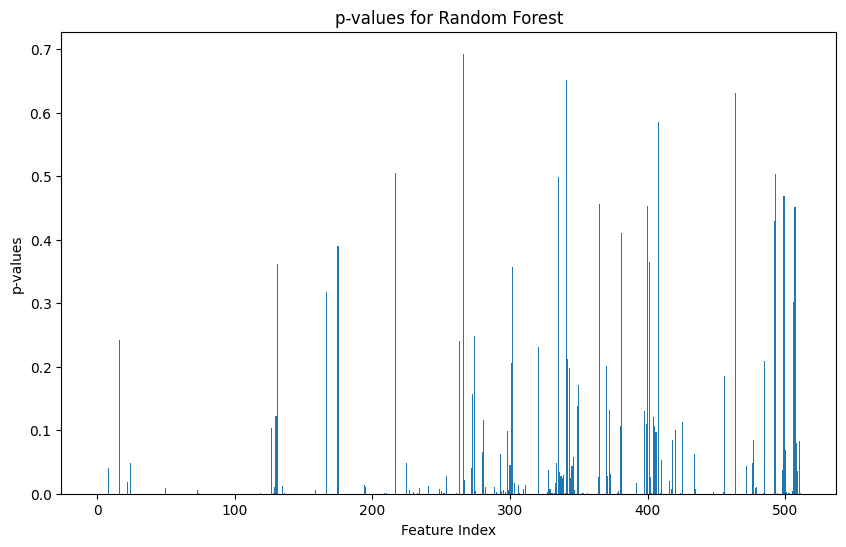

In [44]:
import matplotlib.pyplot as plt


# Create a bar plot for F-scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(f_scores_model1)), f_scores_model1)
plt.xlabel('Feature Index')
plt.ylabel('F-scores')
plt.title('F-scores for Random Forest')
plt.show()

# Create a bar plot for p-values
plt.figure(figsize=(10, 6))
plt.bar(range(len(p_values_model1)), p_values_model1)
plt.xlabel('Feature Index')
plt.ylabel('p-values')
plt.title('p-values for Random Forest')
plt.show()


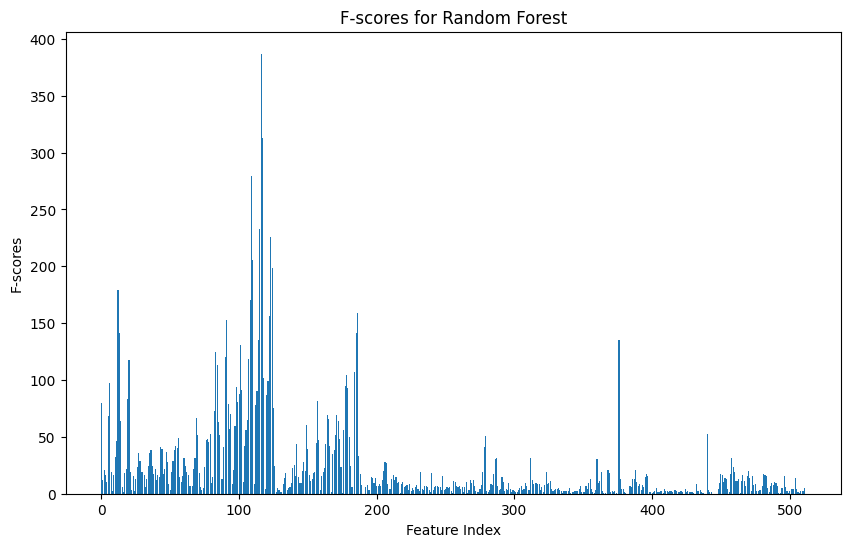

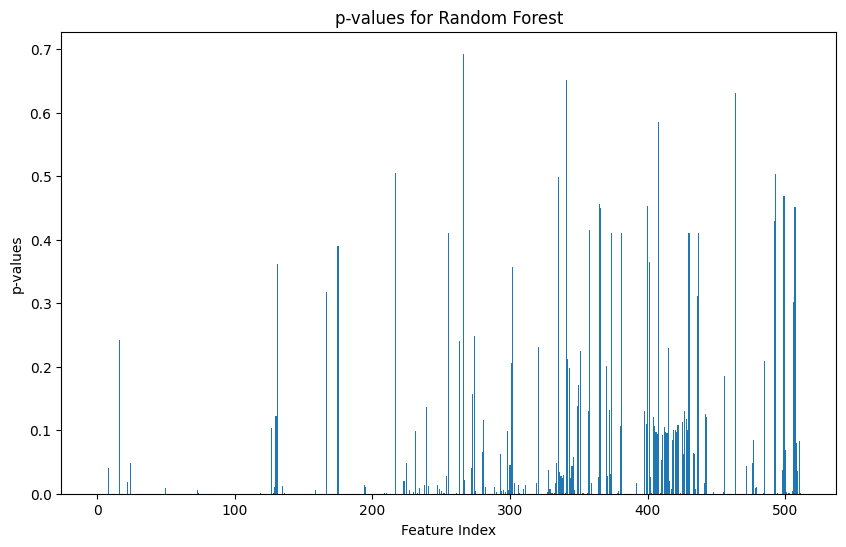

In [45]:
import matplotlib.pyplot as plt


# Create a bar plot for F-scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(f_scores_model2)), f_scores_model2)
plt.xlabel('Feature Index')
plt.ylabel('F-scores')
plt.title('F-scores for Random Forest')
plt.show()

# Create a bar plot for p-values
plt.figure(figsize=(10, 6))
plt.bar(range(len(p_values_model2)), p_values_model2)
plt.xlabel('Feature Index')
plt.ylabel('p-values')
plt.title('p-values for Random Forest')
plt.show()

In [47]:
import pickle

# Save the model to a file
with open('./model/model_lr.pkl', 'wb') as file:
    pickle.dump(logreg_model, file)

In [48]:
import pickle

# Save the model to a file
with open('./model/model_rfc.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)